🛠️ Schritt 1: Vorbereitung & Installation
Zuerst brauchen wir ein paar Python-Bibliotheken. Falls du sie noch nicht hast, kannst du sie ganz einfach installieren.


In [30]:
pip install umap-learn pandas numpy matplotlib seaborn ipywidgets

Note: you may need to restart the kernel to use updated packages.


🐧 Schritt 2: Unser Beispieldatensatz: Pinguine!
Wir verwenden den "Penguins"-Datensatz. Er enthält Messwerte von drei verschiedenen Pinguin-Arten. Perfekt, um Cluster zu visualisieren!

In [31]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
import seaborn as sns
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from ipywidgets import interact, FloatSlider, IntSlider

penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

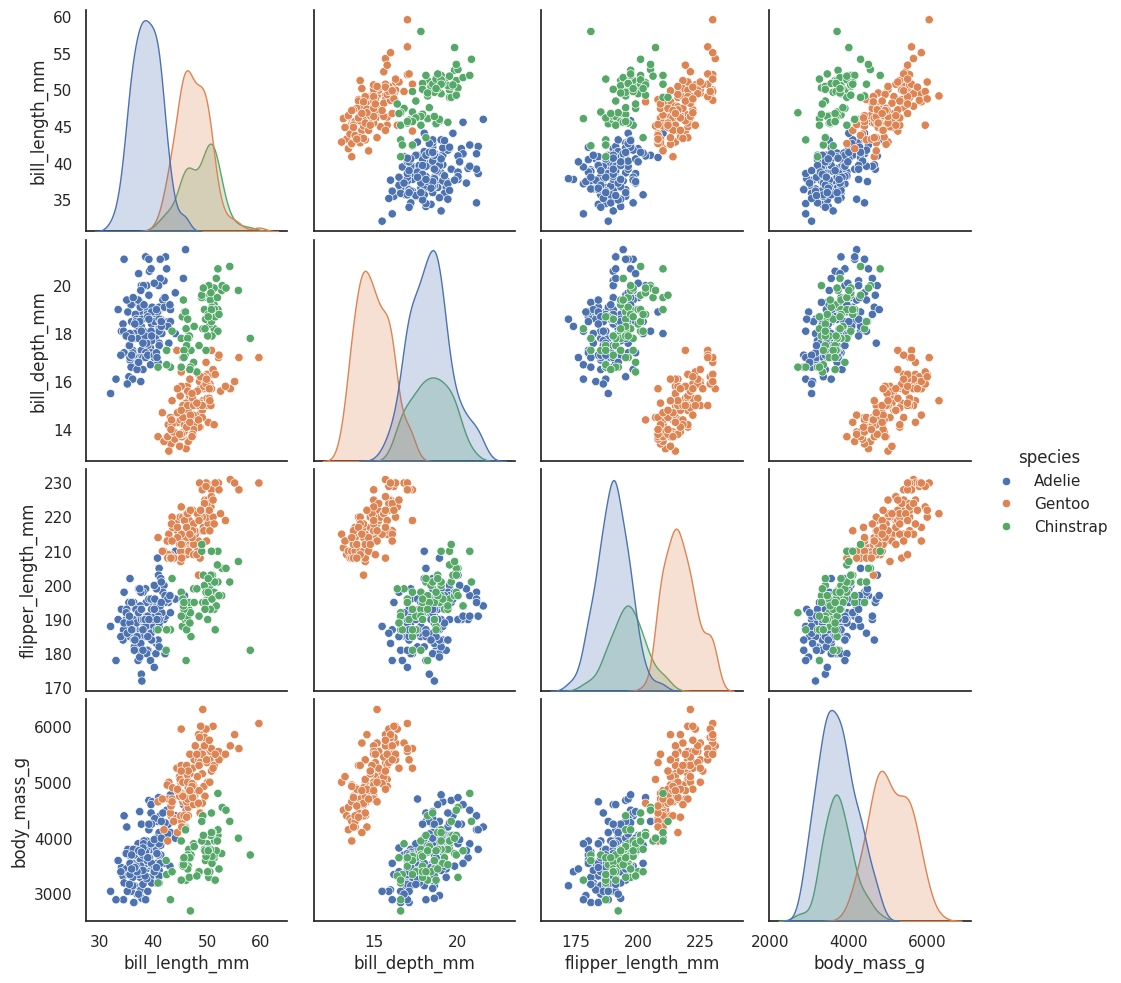

In [32]:
sns.pairplot(penguins.drop("year", axis=1), hue='species')

🗺️ Schritt 3: Statische UMAP-Karte erstellen
Bevor wir es interaktiv machen, erstellen wir eine erste, feste UMAP-Karte. So sehen wir das Grundprinzip.

Wir wählen nur die Spalten mit den Messwerten aus, da UMAP mit Zahlen arbeitet.

/home/karl-/git/liquidstatemachines/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

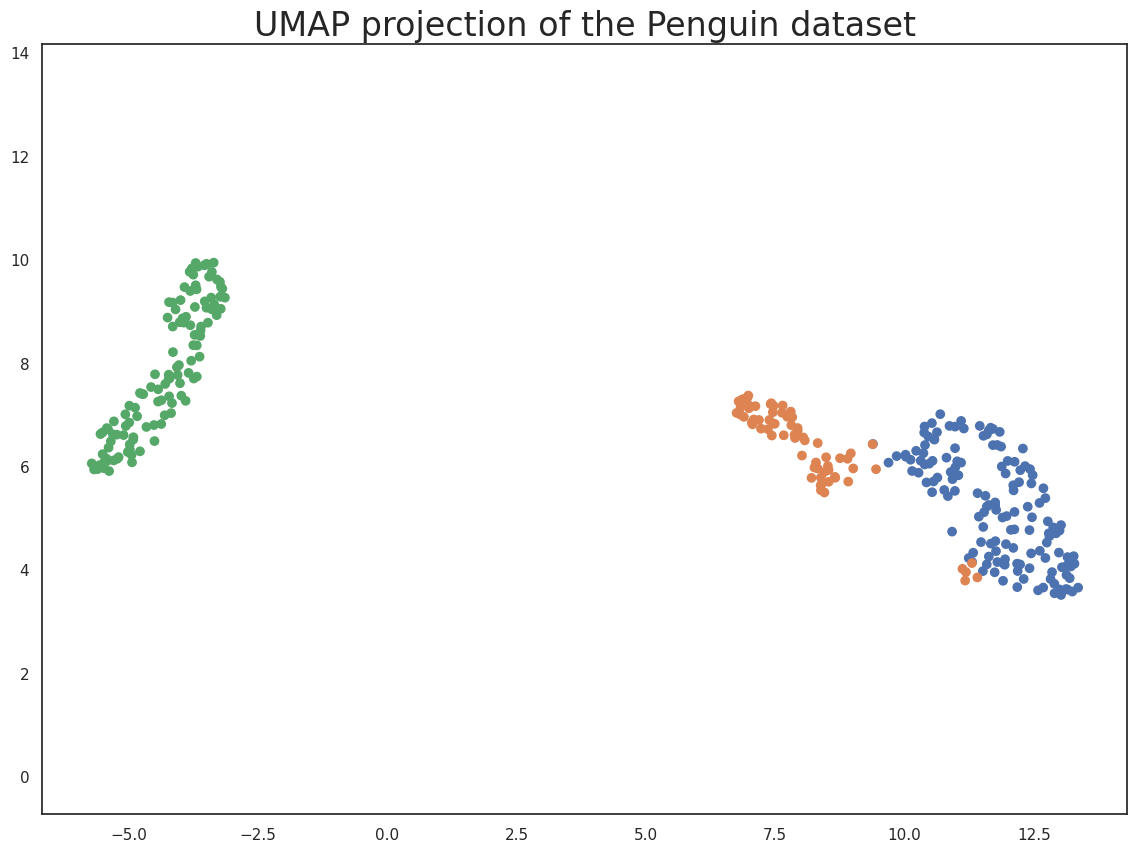

In [36]:
# Wähle nur die numerischen Features für die UMAP-Analyse aus
penguins = penguins.dropna()
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

# UMAP-Modell initialisieren
# n_neighbors: Wie viele Nachbarn beeinflussen die Position eines Punktes?
# min_dist: Wie dicht dürfen ähnliche Punkte zusammenrücken?
reducer = umap.UMAP(n_neighbors=50, min_dist=0.1, random_state=42)

# Führe die Dimensionsreduktion durch
embedding = reducer.fit_transform(scaled_penguin_data)
# Visualisiere das Ergebnis
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

🎛️ Schritt 4: Interaktive Visualisierung mit Slidern
Jetzt kommt der beste Teil! Wir bauen eine Funktion, die UMAP jedes Mal neu berechnet, wenn wir an den Reglern für die Parameter n_neighbors und min_dist ziehen.

n_neighbors: Bestimmt, ob UMAP eher die lokale (kleiner Wert) oder die globale (großer Wert) Struktur der Daten zeigen soll.

Beispiel: Ein kleiner Wert ist wie eine Lupe 🔎, ein großer Wert wie ein Blick aus dem Flugzeug ✈️.

min_dist: Kontrolliert, wie eng die Punkte in einem Cluster zusammengepackt werden.

Beispiel: Ein kleiner Wert erzeugt dichte, kompakte Cluster. Ein großer Wert lässt den Clustern mehr Raum.

In [ ]:
# Definiere eine Funktion, die die UMAP-Visualisierung erstellt
def interactive_umap(n_neighbors, min_dist):
    # Führe UMAP mit den Parametern aus dem Slider aus
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=42,
        n_components=2
    )
    embedding = reducer.fit_transform(scaled_penguin_data)
    
    # Erstelle den Plot
    plt.figure(figsize=(9, 7))
    sns.scatterplot(
        x=embedding[:, 0], 
        y=embedding[:, 1], 
        hue=penguins['species'], 
        palette=sns.color_palette("hls", 3),
        s=50
    )
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'UMAP mit n_neighbors={n_neighbors} und min_dist={min_dist:.2f}', fontsize=16)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend(title='Pinguin-Art')
    plt.show()

# Erstelle die interaktiven Slider
interact(
    interactive_umap, 
    n_neighbors=IntSlider(min=2, max=100, step=1, value=15, description='Nachbarn (n_neighbors)'), 
    min_dist=FloatSlider(min=0.0, max=0.99, step=0.01, value=0.1, description='Mindestabstand (min_dist)')
)

interactive(children=(IntSlider(value=15, description='Nachbarn (n_neighbors)', min=2), FloatSlider(value=0.1,…

<function __main__.interactive_umap(n_neighbors, min_dist)>